In [1]:
# This notebook reads the results and return average demand for each agent

In [13]:
import json

import pandas as pd

from results.results import *

In [14]:
# Read the results

In [56]:
results = pd.read_csv('../results/simulation_results.csv')

In [57]:
results

,date,M1: realised_demand,M2: scheduled_demand,M3: shifted_load,M4: total_generation,M5: savings_on_ToD,M6: energy_costs
0,2021-01-01,"{'hh3_consumption [kWh]_1': 37.19186982076816,...","{'hh3_consumption [kWh]_1': 37.19186982076816,...","{""hh3_consumption [kWh]_1"": 0, ""hh2_consumptio...","{""<class 'model.agents.Solar'>"": 101.392717919...","{""hh3_consumption [kWh]_1"": 0.0, ""hh2_consumpt...","{""hh3_consumption [kWh]_1"": 11.6779805846074, ..."
1,2021-01-01,"{'hh3_consumption [kWh]_1': 37.19186982076816,...","{'hh3_consumption [kWh]_1': 37.19186982076816,...","{""hh3_consumption [kWh]_1"": 0, ""hh2_consumptio...","{""<class 'model.agents.Solar'>"": 101.392717919...","{""hh3_consumption [kWh]_1"": 0.0, ""hh2_consumpt...","{""hh3_consumption [kWh]_1"": 11.6779805846074, ..."
2,2021-01-02,"{'hh3_consumption [kWh]_1': 37.24613137504207,...","{'hh3_consumption [kWh]_1': 37.24613137504207,...","{""hh3_consumption [kWh]_1"": 0.1089336113003190...","{""<class 'model.agents.Solar'>"": 195.798835440...","{""hh3_consumption [kWh]_1"": 0.0315667818826064...","{""hh3_consumption [kWh]_1"": 11.66213771592229,..."
3,2021-01-03,"{'hh3_consumption [kWh]_1': 37.27901780520719,...","{'hh3_consumption [kWh]_1': 37.27901780520719,...","{""hh3_consumption [kWh]_1"": 0, ""hh2_consumptio...","{""<class 'model.agents.Solar'>"": 133.47707672}","{""hh3_consumption [kWh]_1"": 0.0, ""hh2_consumpt...","{""hh3_consumption [kWh]_1"": 11.703234327538143..."
4,2021-01-04,"{'hh3_consumption [kWh]_1': 37.27901780520719,...","{'hh3_consumption [kWh]_1': 37.27901780520719,...","{""hh3_consumption [kWh]_1"": 0, ""hh2_consumptio...","{""<class 'model.agents.Solar'>"": 129.465744720...","{""hh3_consumption [kWh]_1"": 0.0, ""hh2_consumpt...","{""hh3_consumption [kWh]_1"": 11.703234327538143..."
...,...,...,...,...,...,...,...
360,2021-12-26,{'hh3_consumption [kWh]_1': 31.988718857112268...,{'hh3_consumption [kWh]_1': 31.988718857112268...,"{""hh3_consumption [kWh]_1"": 0.1247922552106405...","{""<class 'model.agents.Solar'>"": 176.314505119...","{""hh3_consumption [kWh]_1"": 0.0733753502187524...","{""hh3_consumption [kWh]_1"": 19.639954303112145..."
361,2021-12-27,"{'hh3_consumption [kWh]_1': 33.1030252497206, ...","{'hh3_consumption [kWh]_1': 33.1030252497206, ...","{""hh3_consumption [kWh]_1"": 0.1247922552106405...","{""<class 'model.agents.Solar'>"": 129.354496960...","{""hh3_consumption [kWh]_1"": 0.0733753502187524...","{""hh3_consumption [kWh]_1"": 20.295144175837994..."
362,2021-12-28,{'hh3_consumption [kWh]_1': 33.060073820507114...,{'hh3_consumption [kWh]_1': 33.060073820507114...,"{""hh3_consumption [kWh]_1"": 0.1478325929079251...","{""<class 'model.agents.Solar'>"": 198.254460560...","{""hh3_consumption [kWh]_1"": 0.0869226079780018...","{""hh3_consumption [kWh]_1"": 20.256342336729798..."
363,2021-12-29,"{'hh3_consumption [kWh]_1': 32.04170974042323,...","{'hh3_consumption [kWh]_1': 32.04170974042323,...","{""hh3_consumption [kWh]_1"": 0.1478325929079251...","{""<class 'model.agents.Solar'>"": 173.828584800...","{""hh3_consumption [kWh]_1"": 0.0869226079780018...","{""hh3_consumption [kWh]_1"": 19.657564624922074..."


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = extract_df_from_json(results, 'M1: realised_demand')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.set_index('date', inplace=True, drop=True)

total_generation = extract_df_from_json(results, 'M4: total_generation')
total_generation['date'] = pd.to_datetime(total_generation['date'], format='%Y-%m-%d')
total_generation.set_index('date', inplace=True, drop=True)

residential = df.columns.to_list()[:-2]
non_residential = df.columns.to_list()[-2:]

In [60]:
total_generation

,<class 'model.agents.Solar'>
date,
2021-01-01,101.392718
2021-01-02,195.798835
2021-01-03,133.477077
2021-01-04,129.465745
2021-01-05,142.371306
...,...
2021-12-26,176.314505
2021-12-27,129.354497
2021-12-28,198.254461


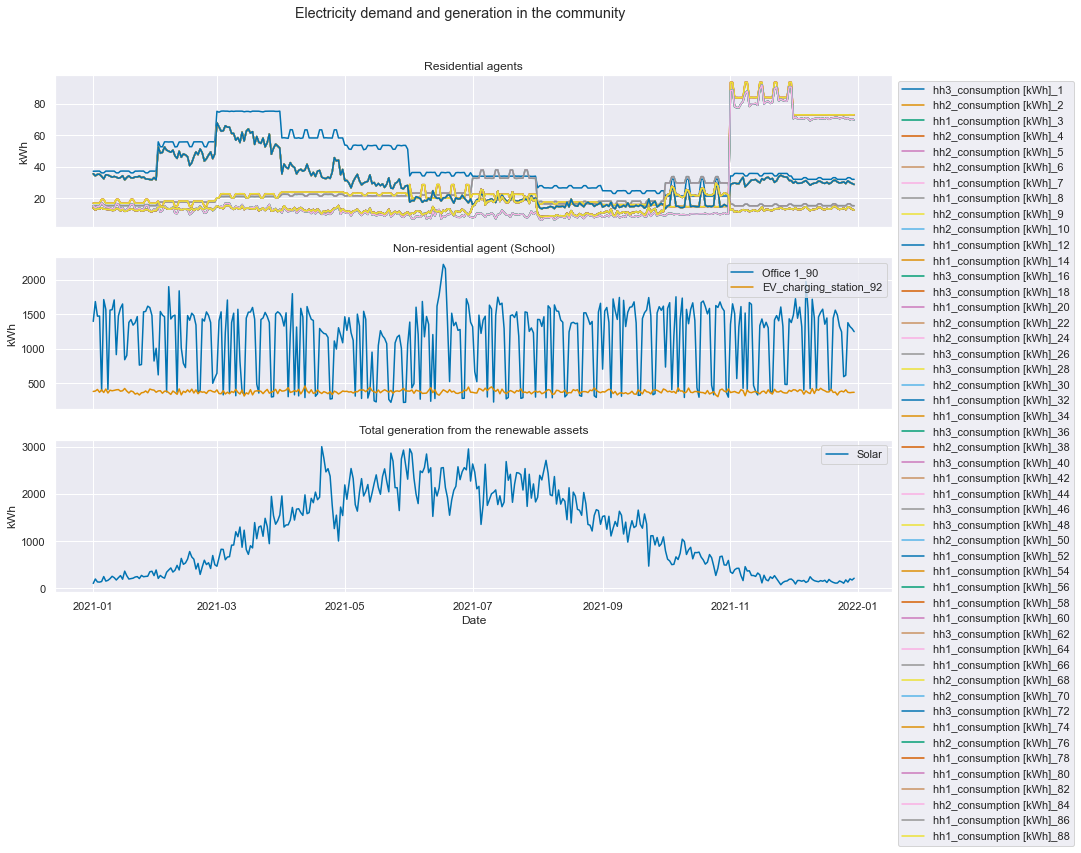

In [61]:
fig, axs = plt.subplots(3, 1, figsize=(15, 9.5), sharex=True)
sns.set_theme(palette='colorblind')
axs[0].plot(df[residential], label=residential)
axs[0].title.set_text('Residential agents')

axs[1].plot(df[non_residential], label=non_residential)
axs[1].title.set_text('Non-residential agent (School)')

axs[2].plot(total_generation, label='Solar')
axs[2].title.set_text('Total generation from the renewable assets')

plt.xlabel('Date')
axs[0].set_ylabel('kWh')
axs[1].set_ylabel('kWh')
axs[2].set_ylabel('kWh')
fig.suptitle('Electricity demand and generation in the community')

axs[0].legend(bbox_to_anchor=(1, 1))
axs[1].legend()
axs[2].legend()

plt.tight_layout()



In [62]:
shifted_load = extract_df_from_json(results, 'M3: shifted_load')
shifted_load['date'] = pd.to_datetime(shifted_load['date'], format='%Y-%m-%d')
shifted_load.set_index('date', inplace=True, drop=True)

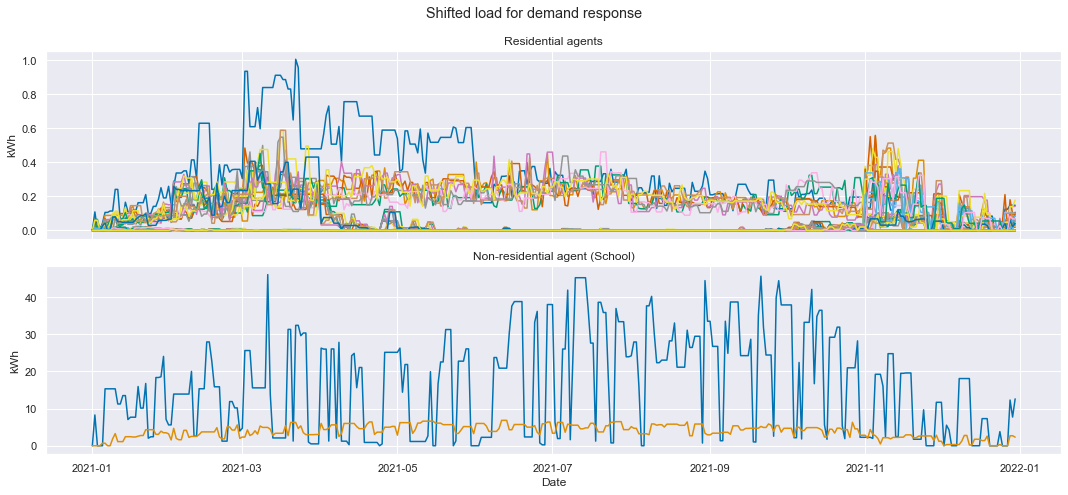

In [63]:
fig, axs = plt.subplots(2, 1, figsize=(15, 7), sharex=True)
sns.set_theme(palette='colorblind')
axs[0].plot(shifted_load[residential], label=residential)
axs[0].title.set_text('Residential agents')
axs[1].plot(shifted_load[non_residential], label=non_residential)
axs[1].title.set_text('Non-residential agent (School)')
plt.xlabel('Date')
axs[0].set_ylabel('kWh')
axs[1].set_ylabel('kWh')
fig.suptitle('Shifted load for demand response')

# axs[0].legend()
# axs[1].legend()

plt.tight_layout()

In [64]:
shifted_load

,hh3_consumption [kWh]_1,hh2_consumption [kWh]_2,hh1_consumption [kWh]_3,hh2_consumption [kWh]_4,hh2_consumption [kWh]_5,hh2_consumption [kWh]_6,hh1_consumption [kWh]_7,hh1_consumption [kWh]_8,hh2_consumption [kWh]_9,hh2_consumption [kWh]_10,...,hh1_consumption [kWh]_74,hh2_consumption [kWh]_76,hh1_consumption [kWh]_78,hh1_consumption [kWh]_80,hh1_consumption [kWh]_82,hh2_consumption [kWh]_84,hh1_consumption [kWh]_86,hh1_consumption [kWh]_88,Office 1_90,EV_charging_station_92
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2021-01-02,0.108934,0.000000,0.024494,0.000000,0.055619,0.000000,0.000000,0.024350,0.000000,0.009708,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,8.288873,0.000000
2021-01-03,0.000000,0.000000,0.024494,0.000000,0.055619,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2021-01-04,0.000000,0.000000,0.024494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2021-01-05,0.043802,0.029347,0.014338,0.000000,0.029920,0.000000,0.009985,0.013683,0.027850,0.000000,...,0.0,0.002923,0.0,0.0,0.0,0.004378,0.0,0.0,0.000000,0.686026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-26,0.124792,0.000000,0.064730,0.210573,0.000000,0.000000,0.048427,0.063903,0.000000,0.044428,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2021-12-27,0.124792,0.000000,0.000000,0.000000,0.000000,0.000000,0.048427,0.063903,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2021-12-28,0.147833,0.000000,0.041530,0.180339,0.141351,0.106702,0.058108,0.063903,0.139227,0.055801,...,0.0,0.000000,0.0,0.0,0.0,0.083725,0.0,0.0,12.310507,2.696189


In [54]:
df = pd.read_csv("../data/processed/model_input_data.csv", parse_dates=['Local'], infer_datetime_format=True,
                 index_col=0)

In [55]:
df

,Office 1,Office 2,Office 3,Office 4,School,EV_charging_station,Irradiance [W/m^2],T_ambient [Degrees Celsius],T_ground [Degrees Celsius],Wind [m/s],Cloud [okta],Pressure [Pa],Rain [mm/hr],Diffuse [W/m^2],Direct [W/m^2],Elevation [Degrees],Azimuth [Degrees],hh1_consumption [kWh],hh2_consumption [kWh],hh3_consumption [kWh]
Local,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:30:00,9.4,4.8,1.8,18.5,12.336667,2.46,0.0,3066.0,1.73,7.268,6489.0,101607108.0,0.068,0.0,0.0,-60049.0,21.785,0.157249,0.122680,0.384985
2021-01-01 00:45:00,9.4,5.1,1.8,17.0,11.323333,2.46,0.0,3066.0,1.73,7.268,6489.0,101607108.0,0.068,0.0,0.0,-60049.0,21.785,0.154470,0.123942,0.354953
2021-01-01 01:00:00,9.4,4.8,1.7,21.0,11.915000,5.58,0.0,3066.0,1.73,7.268,6489.0,101607108.0,0.068,0.0,0.0,-60049.0,21.785,0.149123,0.122407,0.323749
2021-01-01 01:15:00,9.6,4.6,1.8,17.5,11.575000,5.58,0.0,3066.0,1.73,7.268,6489.0,101607108.0,0.068,0.0,0.0,-60049.0,21.785,0.143373,0.121962,0.301651
2021-01-01 01:30:00,8.7,4.6,1.8,20.0,12.170000,5.58,0.0,2949.0,1625.00,6.938,6124.0,101613804.0,0.055,0.0,0.0,-54847.0,45.722,0.142570,0.118858,0.288491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01 00:00:00,9.4,4.8,1.8,18.5,12.336667,2.46,0.0,3066.0,1.73,7.268,6489.0,101607108.0,0.068,0.0,0.0,-60049.0,21.785,0.157249,0.122680,0.384985
2021-01-01 00:15:00,9.4,4.8,1.8,18.5,12.336667,2.46,0.0,3066.0,1.73,7.268,6489.0,101607108.0,0.068,0.0,0.0,-60049.0,21.785,0.157249,0.122680,0.384985
2021-12-31 23:15:00,5.1,5.5,1.5,16.0,11.846364,4.74,0.0,3245.0,2038.00,7.448,6514.0,101634525.0,0.054,0.0,0.0,-58117.0,326.722,0.199495,0.945290,0.445335


In [ ]:
df.loc[, 'Wind [m/s]']

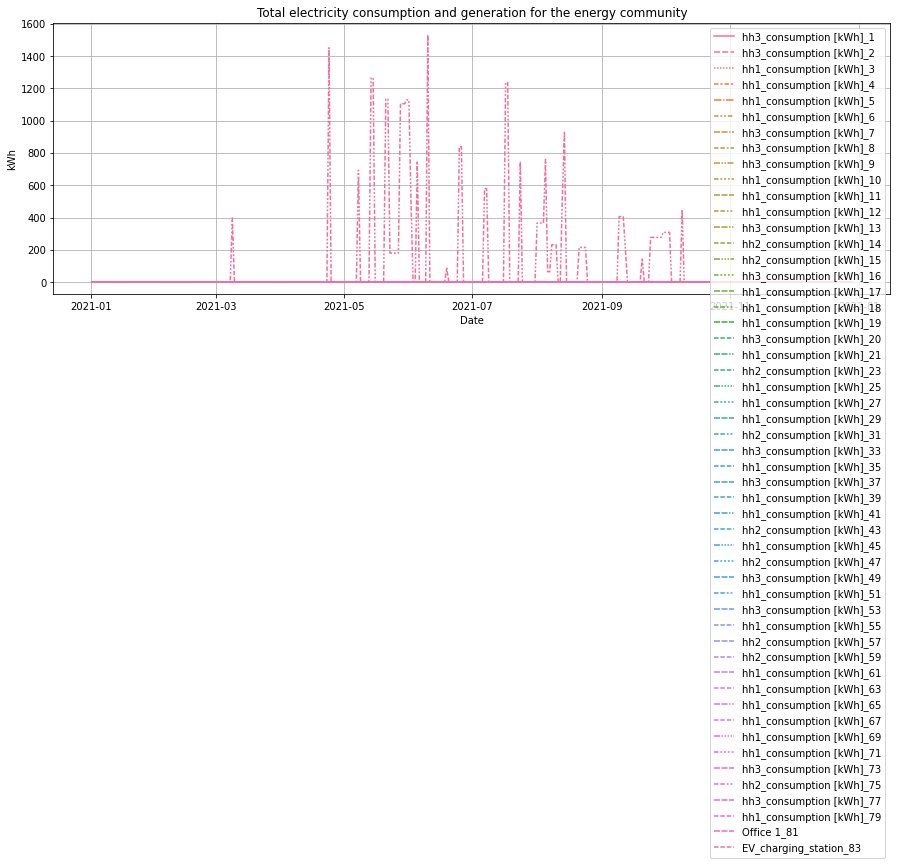

In [23]:
# columns = ['hh3_consumption [kWh]_1', 'hh3_consumption [kWh]_2', 'Office 1_3', 'Office 2_5', 'school_mbo_7']

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.lineplot(data=savings_on_ToD, ax=ax)
ax.grid(True)
plt.xticks(rotation=0)
plt.legend()
plt.title('Total electricity consumption and generation for the energy community')
plt.xlabel('Date')
plt.ylabel('kWh')
plt.tight_layout()

In [34]:
df

,scheduled_demand,total_generation,realised_demand,date
date,,,,
2021-01-01,386194.751753,45184.34664,384974.285113,2021-01-01
2021-01-02,412178.248041,30802.40232,411117.565721,2021-01-02
2021-01-03,465633.853328,29876.71032,464851.983008,2021-01-03
2021-01-04,383581.674598,32854.91688,383477.735638,2021-01-04
2021-01-05,388804.660809,57065.87928,387933.621049,2021-01-05
...,...,...,...,...
2021-12-25,385947.467916,40687.96272,385728.385196,2021-12-25
2021-12-26,436386.196439,29851.03776,435470.238679,2021-12-26
2021-12-27,394457.192325,45751.02936,393589.662965,2021-12-27


In [14]:
# realised_demand = extract_df(results, 'realised_demand')
shifted_load = extract_df_from_json(results, 'shifted_load')
generation = extract_df_from_json(results, 'total_generation')

In [15]:
extract_df_from_json(results, 'shifted_load')

,hh2_consumption [kWh]_1,hh2_consumption [kWh]_2,Office 1_3,Office 2_5,school_mbo_7,EV_bus_charging_station_8
date,,,,,,
2021-01-01,0.122764,0.185158,0.0,0.0,37.959453,3267.243255
2021-01-02,0.223067,0.204258,0.0,0.0,35.436188,3238.484659
2021-01-03,0.200786,0.153155,0.0,0.0,41.623292,3705.338121
2021-01-04,0.144490,0.159691,0.0,0.0,43.192701,3773.201098
2021-01-05,0.197018,0.202772,0.0,0.0,45.946510,4419.129000
2021-01-06,0.212869,0.113631,0.0,0.0,35.973917,3520.706132
2021-01-07,0.197444,0.207275,0.0,0.0,22.322331,3457.167608
2021-01-08,0.152506,0.141440,0.0,0.0,31.124768,2564.580189
2021-01-09,0.240160,0.190526,0.0,0.0,45.733919,4105.492099


In [16]:
extract_df_from_json(results, 'realised_demand')

,hh2_consumption [kWh]_1,hh2_consumption [kWh]_2,Office 1_3,Office 2_5,school_mbo_7,EV_bus_charging_station_8
date,,,,,,
2021-01-01,16.841555,16.875931,1031.357892,658.7224,2573.693438,380308.344601
2021-01-02,16.846803,16.870203,836.647396,559.1512,3040.212015,405789.541268
2021-01-03,16.865564,16.866759,845.498796,473.4312,3018.749489,461188.784403
2021-01-04,19.266013,19.225501,293.025524,289.1000,2550.924404,378096.904581
2021-01-05,19.148707,19.271986,938.089084,484.5000,2547.098403,384129.108662
2021-01-06,16.806125,16.868197,946.896792,587.5024,2581.307449,423635.019991
2021-01-07,16.748026,16.923727,290.033634,289.5968,2564.130712,397379.329053
2021-01-08,16.780386,16.812893,716.771092,527.7984,2566.032227,393263.254598
2021-01-09,16.748814,16.743756,687.900000,540.6000,3011.094697,421879.376709


In [17]:
extract_df_from_json(results, 'scheduled_demand')

,hh2_consumption [kWh]_1,hh2_consumption [kWh]_2,Office 1_3,Office 2_5,school_mbo_7,EV_bus_charging_station_8
date,,,,,,
2021-01-01,16.841555,16.875931,1700.4,1212.8,2573.693438,380308.344601
2021-01-02,16.846803,16.870203,1484.0,973.3,3040.212015,405789.541268
2021-01-03,16.865564,16.866759,1485.2,616.3,3018.749489,461188.784403
2021-01-04,19.266013,19.225501,403.7,294.4,2550.924404,378096.904581
2021-01-05,19.148707,19.271986,1727.6,566.5,2547.098403,384129.108662
2021-01-06,16.806125,16.868197,1583.6,990.9,2581.307449,423635.019991
2021-01-07,16.748026,16.923727,424.3,334.6,2564.130712,397379.329053
2021-01-08,16.780386,16.812893,1576.8,978.1,2566.032227,393263.254598
2021-01-09,16.748814,16.743756,1587.0,1055.3,3011.094697,421879.376709


In [11]:
day_ahead_demand

,<model.agents.Residential object at 0x0000021A9219E8F0>,<model.agents.Residential object at 0x0000021A9219F280>,<model.agents.EVChargingStation object at 0x0000021A9219C760>,<model.agents.NonResidential object at 0x0000021A9219FA00>,<model.agents.NonResidential object at 0x0000021A9219D690>,<model.agents.NonResidential object at 0x0000021A9219CEE0>
date,,,,,,
2021-01-01,15.086337,15.086337,405480.0,2185.147396,2184.9512,3035.150000
2021-01-02,15.086337,15.086337,460560.0,1698.198796,1698.0312,3035.150000
2021-01-03,15.706719,15.706719,380280.0,1080.239364,1067.0728,2567.136667
2021-01-04,15.706719,15.706719,383640.0,2073.989084,2073.7048,2567.136667
2021-01-05,15.086337,15.086337,424080.0,2034.696792,2032.3024,2567.136667
2021-01-06,15.086337,15.086337,399000.0,1133.478864,1125.1208,2567.136667
2021-01-07,15.086337,15.086337,392760.0,1970.771092,1939.7624,2567.136667
2021-01-08,15.086337,15.086337,422160.0,1866.000000,1866.0000,3035.150000
2021-01-09,15.086337,15.086337,379320.0,2096.068388,2094.9936,3035.150000


In [12]:
results['tod surplus'][1]

"[Timestamp('2021-01-02 09:00:00', freq='H'), Timestamp('2021-01-02 10:00:00', freq='H'), Timestamp('2021-01-02 11:00:00', freq='H'), Timestamp('2021-01-02 12:00:00', freq='H'), Timestamp('2021-01-02 13:00:00', freq='H'), Timestamp('2021-01-02 14:00:00', freq='H'), Timestamp('2021-01-02 15:00:00', freq='H')]"

In [13]:
results['tod deficit'][1]

"[Timestamp('2021-01-02 01:00:00'), Timestamp('2021-01-02 06:00:00'), Timestamp('2021-01-02 07:00:00'), Timestamp('2021-01-02 08:00:00'), Timestamp('2021-01-02 09:00:00'), Timestamp('2021-01-02 10:00:00'), Timestamp('2021-01-02 17:00:00')]"

In [14]:
shifted_load

,<model.agents.Residential object at 0x0000021A9219E8F0>,<model.agents.Residential object at 0x0000021A9219F280>,<model.agents.EVChargingStation object at 0x0000021A9219C760>,<model.agents.NonResidential object at 0x0000021A9219FA00>,<model.agents.NonResidential object at 0x0000021A9219D690>,<model.agents.NonResidential object at 0x0000021A9219CEE0>
date,,,,,,
2021-01-01,0,0,0,0,0,0
2021-01-02,0,0,0,0,0,0
2021-01-03,0,0,0,0,0,0
2021-01-04,0,0,0,0,0,0
2021-01-05,0,0,0,0,0,0
2021-01-06,0,0,0,0,0,0
2021-01-07,0,0,0,0,0,0
2021-01-08,0,0,0,0,0,0
2021-01-09,0,0,0,0,0,0


In [19]:
generation

,<class 'model.agents.Solar'>
0,256211.598744
1,256211.598744
2,494768.595708
3,337286.305404
4,327149.978004
5,359761.339836
6,624871.378116
7,381491.480808
8,421425.060336
9,512870.522508


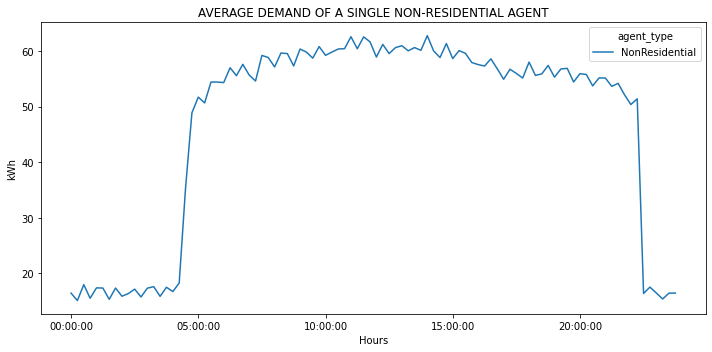

In [6]:
agent_list = [NonResidential]
avg_demand = extract_results(results, column='avg agent demand', agent_list=agent_list)
plot_results(avg_demand, plt_title='Average demand of a single non-residential agent', kind='line', stacked=False)

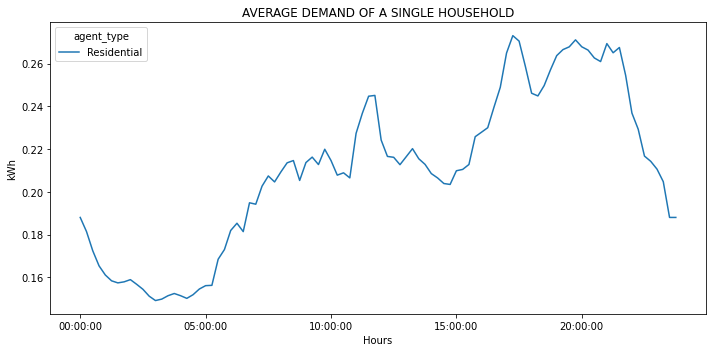

In [7]:
agent_list = [Residential]
avg_demand = extract_results(results, column='avg agent demand', agent_list=agent_list)
plot_results(avg_demand, plt_title='Average demand of a single household', kind='line', stacked=False)

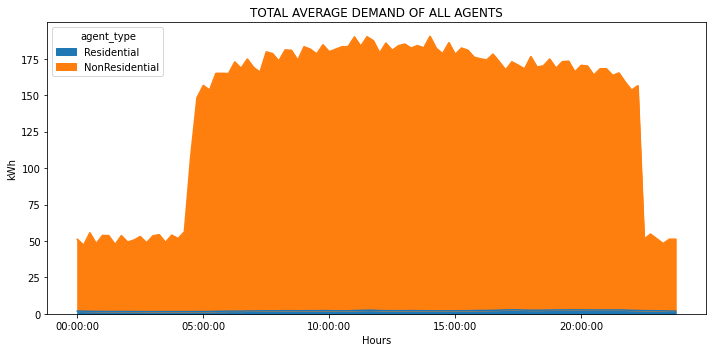

In [8]:
agent_list = [Residential, NonResidential]
total_demand = extract_results(results, column='total agent demand', agent_list=agent_list)
plot_results(total_demand, plt_title='Total average demand of all agents', kind='area', stacked=True)

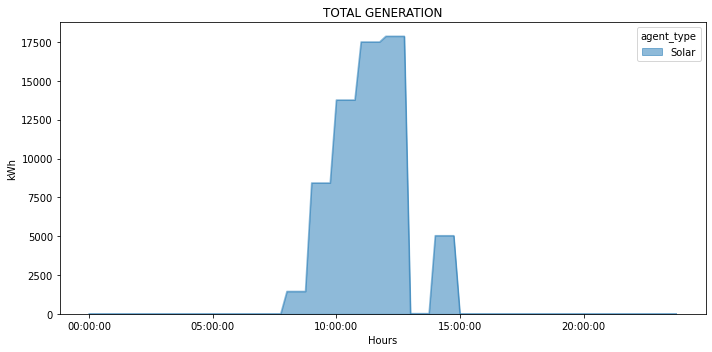

In [9]:
generators = [Solar]
total_demand = avg_demand = extract_results(results, column='total generation', agent_list=generators)
plot_results(total_demand, plt_title='Total generation', kind='area', stacked=False)

AttributeError: 'numpy.float64' object has no attribute 'plot'

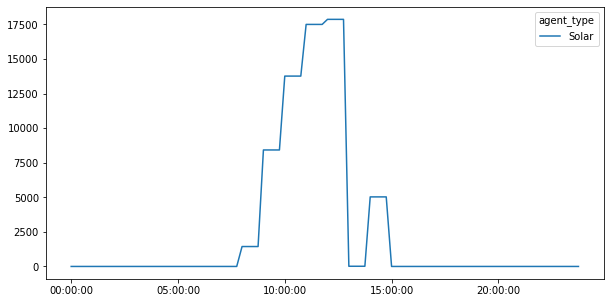

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
total_demand.plot(ax=ax)
total_demand['Solar'].mean(axis=0).plot(ax=ax, color='red', linewidth=2)
plt.xlabel('Hours')
plt.ylabel('kWh')
plt.tight_layout()



In [ ]:
total_demand['Solar'].quantile(0.7)

In [ ]:
total_demand[total_demand['Solar'] > total_demand['Solar'].quantile(0.70)].index

In [ ]:
demand

In [ ]:
generators = [Solar]
total_demand = avg_demand = extract_results(results, column='avg generation', agent_list=generators)
plot_results(total_demand, plt_title='Average generation', kind='line', stacked=False)

In [46]:
random.choices([True, False],
               weights=(1, 1 - 1),
               cum_weights=None, k=1)

[True]

___

In [4]:
results

,energy costs,avg agent demand,total agent demand,total generation,avg generation,savings
0,NaN,NaN,NaN,"{""<class 'model.agents.Solar'>"": [0.0, 0.0, 0....","{""<class 'model.agents.Solar'>"": [0.0, 0.0, 0....","{""<model.agents.Residential object at 0x000002..."
1,NaN,NaN,NaN,"{""<class 'model.agents.Solar'>"": [0.0, 0.0, 0....","{""<class 'model.agents.Solar'>"": [0.0, 0.0, 0....","{""<model.agents.Residential object at 0x000002..."
2,NaN,NaN,NaN,"{""<class 'model.agents.Solar'>"": [0.0, 0.0, 0....","{""<class 'model.agents.Solar'>"": [0.0, 0.0, 0....","{""<model.agents.Residential object at 0x000002..."
3,NaN,NaN,NaN,"{""<class 'model.agents.Solar'>"": [0.0, 0.0, 0....","{""<class 'model.agents.Solar'>"": [0.0, 0.0, 0....","{""<model.agents.Residential object at 0x000002..."
4,NaN,NaN,NaN,"{""<class 'model.agents.Solar'>"": [0.0, 0.0, 0....","{""<class 'model.agents.Solar'>"": [0.0, 0.0, 0....","{""<model.agents.Residential object at 0x000002..."
5,NaN,NaN,NaN,"{""<class 'model.agents.Solar'>"": [0.0, 0.0, 0....","{""<class 'model.agents.Solar'>"": [0.0, 0.0, 0....","{""<model.agents.Residential object at 0x000002..."
6,NaN,NaN,NaN,"{""<class 'model.agents.Solar'>"": [0.0, 0.0, 0....","{""<class 'model.agents.Solar'>"": [0.0, 0.0, 0....","{""<model.agents.Residential object at 0x000002..."
7,NaN,NaN,NaN,"{""<class 'model.agents.Solar'>"": [0.0, 0.0, 0....","{""<class 'model.agents.Solar'>"": [0.0, 0.0, 0....","{""<model.agents.Residential object at 0x000002..."
8,NaN,NaN,NaN,"{""<class 'model.agents.Solar'>"": [0.0, 0.0, 0....","{""<class 'model.agents.Solar'>"": [0.0, 0.0, 0....","{""<model.agents.Residential object at 0x000002..."
9,NaN,NaN,NaN,"{""<class 'model.agents.Solar'>"": [0.0, 0.0, 0....","{""<class 'model.agents.Solar'>"": [0.0, 0.0, 0....","{""<model.agents.Residential object at 0x000002..."


In [6]:
extract_df(results, 'savings')

,<model.agents.Residential object at 0x000002533124AB00>,<model.agents.Residential object at 0x000002533124B6D0>,<model.agents.Residential object at 0x000002533124BE50>,<model.agents.Residential object at 0x0000025331249630>,<model.agents.Residential object at 0x0000025331248EB0>,<model.agents.Residential object at 0x0000025331248730>,<model.agents.Residential object at 0x00000253312300A0>,<model.agents.Residential object at 0x0000025331230820>,<model.agents.Residential object at 0x0000025331230FA0>,<model.agents.Residential object at 0x0000025331231720>,<model.agents.NonResidential object at 0x0000025331231ED0>,<model.agents.NonResidential object at 0x0000025331233B80>,<model.agents.NonResidential object at 0x00000253312333D0>,<model.agents.EVChargingStation object at 0x0000025331232C50>
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
1,4.876364,4.876364,10.740034,4.876364,4.369318,10.740034,4.876364,10.740034,10.740034,4.876364,1097.082175,1093.601669,743.708779,111275.52
2,4.876364,4.876364,10.740034,4.876364,4.369318,10.740034,4.876364,10.740034,10.740034,4.876364,1097.082175,1093.601669,743.708779,111275.52
3,4.876364,4.876364,10.740034,4.876364,4.369318,10.740034,4.876364,10.740034,10.740034,4.876364,1097.082175,1093.601669,743.708779,111275.52
4,4.876364,4.876364,10.740034,4.876364,4.369318,10.740034,4.876364,10.740034,10.740034,4.876364,1097.082175,1093.601669,743.708779,111275.52
5,4.876364,4.876364,10.740034,4.876364,4.369318,10.740034,4.876364,10.740034,10.740034,4.876364,1097.082175,1093.601669,743.708779,111275.52
6,4.876364,4.876364,10.740034,4.876364,4.369318,10.740034,4.876364,10.740034,10.740034,4.876364,1097.082175,1093.601669,743.708779,111275.52
7,4.876364,4.876364,10.740034,4.876364,4.369318,10.740034,4.876364,10.740034,10.740034,4.876364,1097.082175,1093.601669,743.708779,111275.52
8,4.876364,4.876364,10.740034,4.876364,4.369318,10.740034,4.876364,10.740034,10.740034,4.876364,1097.082175,1093.601669,743.708779,111275.52
9,4.876364,4.876364,10.740034,4.876364,4.369318,10.740034,4.876364,10.740034,10.740034,4.876364,1097.082175,1093.601669,743.708779,111275.52


In [49]:
df

,<model.agents.Residential object at 0x000002533124AB00>,<model.agents.Residential object at 0x000002533124B6D0>,<model.agents.Residential object at 0x000002533124BE50>,<model.agents.Residential object at 0x0000025331249630>,<model.agents.Residential object at 0x0000025331248EB0>,<model.agents.Residential object at 0x0000025331248730>,<model.agents.Residential object at 0x00000253312300A0>,<model.agents.Residential object at 0x0000025331230820>,<model.agents.Residential object at 0x0000025331230FA0>,<model.agents.Residential object at 0x0000025331231720>,<model.agents.NonResidential object at 0x0000025331231ED0>,<model.agents.NonResidential object at 0x0000025331233B80>,<model.agents.NonResidential object at 0x00000253312333D0>,<model.agents.EVChargingStation object at 0x0000025331232C50>
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
1,4.876364,4.876364,10.740034,4.876364,4.369318,10.740034,4.876364,10.740034,10.740034,4.876364,1097.082175,1093.601669,743.708779,111275.52
2,4.876364,4.876364,10.740034,4.876364,4.369318,10.740034,4.876364,10.740034,10.740034,4.876364,1097.082175,1093.601669,743.708779,111275.52
3,4.876364,4.876364,10.740034,4.876364,4.369318,10.740034,4.876364,10.740034,10.740034,4.876364,1097.082175,1093.601669,743.708779,111275.52
4,4.876364,4.876364,10.740034,4.876364,4.369318,10.740034,4.876364,10.740034,10.740034,4.876364,1097.082175,1093.601669,743.708779,111275.52
5,4.876364,4.876364,10.740034,4.876364,4.369318,10.740034,4.876364,10.740034,10.740034,4.876364,1097.082175,1093.601669,743.708779,111275.52
6,4.876364,4.876364,10.740034,4.876364,4.369318,10.740034,4.876364,10.740034,10.740034,4.876364,1097.082175,1093.601669,743.708779,111275.52
7,4.876364,4.876364,10.740034,4.876364,4.369318,10.740034,4.876364,10.740034,10.740034,4.876364,1097.082175,1093.601669,743.708779,111275.52
8,4.876364,4.876364,10.740034,4.876364,4.369318,10.740034,4.876364,10.740034,10.740034,4.876364,1097.082175,1093.601669,743.708779,111275.52
9,4.876364,4.876364,10.740034,4.876364,4.369318,10.740034,4.876364,10.740034,10.740034,4.876364,1097.082175,1093.601669,743.708779,111275.52


In [43]:
random.seed(123)
random.uniform(0, 5)

0.26181799425472163

In [17]:
pd.DataFrame.from_dict(item, index=item.keys())

TypeError: DataFrame.from_dict() got an unexpected keyword argument 'index'

In [13]:
a_series

00:00:00   NaN
00:15:00   NaN
00:30:00   NaN
00:45:00   NaN
01:00:00   NaN
            ..
22:45:00   NaN
23:00:00   NaN
23:15:00   NaN
23:30:00   NaN
23:45:00   NaN
Length: 96, dtype: float64

In [11]:

from model.community_setup import *
agent_list = create_community_configuration(community_name='groene_mient')

In [12]:
agent_list

[{'member_name': 'hh1_consumption [kWh]',
  'member_type': <MemberType.RESIDENTIAL: 1>,
  'agent_type': <AgentType.CONSUMER: 1>,
  'demand_flexibility': 0.2,
  'asset_list': [{'agent_type': model.agents.Asset,
    'asset_type': model.agents.Solar,
    'capacity': 2,
    'efficiency': 0.2,
    'price': 0.15}]},
 {'member_name': 'hh1_consumption [kWh]',
  'member_type': <MemberType.RESIDENTIAL: 1>,
  'agent_type': <AgentType.CONSUMER: 1>,
  'demand_flexibility': 0.2,
  'asset_list': [{'agent_type': model.agents.Asset,
    'asset_type': model.agents.Solar,
    'capacity': 2,
    'efficiency': 0.2,
    'price': 0.15}]},
 {'member_name': 'hh2_consumption [kWh]',
  'member_type': <MemberType.RESIDENTIAL: 1>,
  'agent_type': <AgentType.CONSUMER: 1>,
  'demand_flexibility': 0.2,
  'asset_list': [{'agent_type': model.agents.Asset,
    'asset_type': model.agents.Solar,
    'capacity': 2,
    'efficiency': 0.2,
    'price': 0.15}]},
 {'member_name': 'hh1_consumption [kWh]',
  'member_type': <Memb